In [94]:
# import numpy as np
# import math as m
# import matplotlib.pyplot as plt
# from scipy.integrate import odeint
# from functools import reduce
# import csv
# # %matplotlib inline
# from scipy.interpolate import *


import sys
import os
sys.path.append(os.path.abspath('..'))

from utils import *
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
from diffussion_template import *
from animation_helper import *
from matplotlib import rc
# plt.rcParams['animation.ffmpeg_path']
os.path.abspath('../../ffmpeg')
# sys.path

plt.rcParams['animation.ffmpeg_path'] = os.path.abspath('../../ffmpeg/bin')




In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Variable / Parameter names
#
# n_cells #-- size of grid
# x_coords = np.arange(0,n_cells) #-- x_coordinates of each cell
#
# grid #-- array of values representing concentration in each cell
# kD #-- diffusion rate
#
def d_diffusion(grid,kD):

    n_cells=len(grid)
    d_diff = np.zeros(n_cells)

    # d_diff[i] is the rate of change of
    # conc. in cell grid[i]

    # the rate of flow out of each cell
    # into each neighbour
    # is equal to kD*[conc in cell]

    # we need to use a loop over each cell
    # in the 1D grid and calculate the net rate of
    # change due to diffusion

    # hint
    # 1. write a loop over each cell
    # 2. identify the neighbouring cells
    # 3. sum the rates of flows in and out of this cell
    # 4. store this value in the appropriate element of
    #     array d_diff
#     d_grad=n_cells*[0];
    c0=grid[-1];
    c1=grid[0];
    for i in range(n_cells):
        c2=grid[(i+1)%n_cells];
        d_diff[i]= kD*( -2.*c1+c0+c2);
        c0=c1;
        c1=c2;
    

#     **DELETE THIS AND INSERT CODE FOR DIFFUSION**

    return d_diff

def sdot(s,t,params):

    (kD,r,xm)=params
    # kD is the rate of diffusion

    # s is an array of values
    # for each cell in the grid

    # find size of grid
    n_cells=len(s)

    # create rate array for results
    ds=np.zeros(n_cells)

    # process any reactions occuring in each cell
    for i in range(n_cells):
        ds[i]=r*s[i]*(1-s[i]/xmx);
        pass # the pass command allows us to have an empty loop
             # meaning 'do nothing' this can
             # act as a placeholder for when we want to
             # add reactions e.g. ds[i]= -k*s[i] for degradation

    # calc net rate diffusion in each cell
    # using external function that acts on grid s
    ds=ds+d_diffusion(s,kD)

    return ds






Q:\Ancond41.126\VFS\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


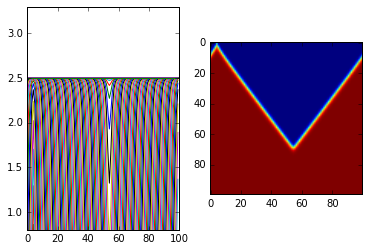

In [72]:
n_cells=100
x_coords=np.arange(0,n_cells)

# create an array for initial cell conditions
s0=np.zeros(n_cells)
# initialises grid with each cell conc set to 0.0

# **DELETE THIS BUT SET CORRECT INITIAL CONDITIONS HERE**
s0=np.ones(n_cells);
s0=np.zeros(n_cells);
s0[4]=.5;
# s0=np.ones(n_cells)

# set all initial concentrations to 1.0
# except in cell 5 which has concentration 3.0


# set diffusion rate
# same for all cells
kD=0.5
r=0.01
xmx=2.5;

kD=0.01
r=0.1
xmx=2.5;

# create array of time observations
t_min=0
t_max=1000.
t_interval=10.
t_obs=np.arange(t_min,t_max,t_interval)

# set initial conditions and parameters
s=s0
params=(kD,)
params=(kD,r,xmx)

# run simulation
s_obs=odeint(sdot,s,t_obs,args=(params,),mxstep=5000000)
# mxstep=5000000 allows more calculations to be taken per timestep
# otherwise Python may complain it is taking too long to solve

# convert to array so we can manipulate it more easily
s_obs=np.array(s_obs)

# plot results
plt.close("all")
fig1 = plt.figure()
ax=plt.subplot(1,2,1)

# each row of s_obs is a time observation
# containing a column for each cell
n_obs=len(t_obs)
for i in range(n_obs):
    ax.plot(x_coords, s_obs[i,:])

ax.set_ylim([0.8,3.3])
fig1.show()

fig2=plt.figure();
ax2=fig1.add_subplot(1,2,2)
# line,=ax2.plot(x_coords,s_obs[0,:]);
# ax2.set_ylim([0.8,3.2])
# anim=plot_time_series(fig2,line,s_obs,frame_interval=5);
# fig2.show()
# ax2.imshow(s_obs, extent=[0, 2, 0, 2])
ax2.imshow(s_obs)

In [77]:


from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20,  writer = FFwriter, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)


from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

# FFwriter = animation.FFMpegWriter()
# display_animation(anim)
# exce(tst)
# from IPython.display import HTML


# 'mencoder'
# anim._repr_html_() is None
# rc('animation', html='html5')

# HTML(anim.to_html5_video())
# anim


# FFwriter.__dict__

Q:\Ancond41.126\VFS\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


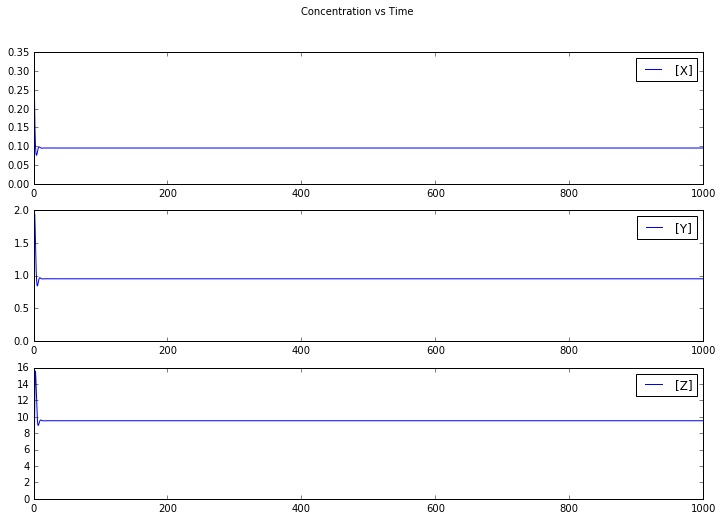

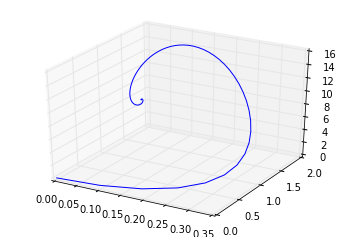

In [100]:
def sdot(s,t,params):
    k1,KI,n,k2,k3,k4,k5,k6=params
    X,Y,Z=s
    dX =k1*1./(KI**n + Z**n) - k2*X
    dY = k3 * X - k4 * Y;
    dZ = k5* Y - k6 * Z;
    ds=(dX,dY,dZ)
    return ds



X=0.;Y=0.;Z=0.;
X=Y=Z=0.

k1=1.
k2=k4=k6=KI=1.;
k3=k5=10.;
n=1.
params=k1,KI,n,k2,k3,k4,k5,k6

s0=X,Y,Z

## RUN MODEL WITH DEFAULT PARAMETER VALUES
runs=[];
for n in np.arange(1.,5.,.5);
    params=k1,KI,n,k2,k3,k4,k5,k6
    t_max=1000
    t_obs=np.linspace(0,t_max,t_max*10)
    s_obs=odeint(sdot,s0,t_obs,args=(params,))
    runs+=[s_obs];
    xs=s_obs[:,0];
    ys=s_obs[:,1];
    zs=s_obs[:,2];

## CREATE TIMESERIES PLOT
plt.close("all")
fig_timeseries = plt.figure(figsize=(12,8))
ax1=fig_timeseries.add_subplot(3,1,1)
ax2=fig_timeseries.add_subplot(3,1,2)
ax3=fig_timeseries.add_subplot(3,1,3)

fig_timeseries.suptitle('Concentration vs Time')
ax1.plot(t_obs, s_obs[:,0], '-',label='[X]')
ax2.plot(t_obs, s_obs[:,1], '-',label='[Y]')
ax3.plot(t_obs, s_obs[:,2], '-',label='[Z]')
ax1.legend()
ax2.legend()
ax3.legend()
fig_timeseries.show()




In [ ]:
runs=[];
ns=np.arange(1.,5.,.5);
for n in ns:
    params=k1,KI,n,k2,k3,k4,k5,k6
    t_max=1000
    t_obs=np.linspace(0,t_max,t_max*10)
    s_obs=odeint(sdot,s0,t_obs,args=(params,))
    runs+=[s_obs];
    xs=s_obs[:,0];
    ys=s_obs[:,1];
    zs=s_obs[:,2];
fig2=plt.figure();
ax4=fig2.add_subplot(1,1,1,projection='3d')

for n,s_obs in zip(ns,runs):
    xs=s_obs[:,0];
    ys=s_obs[:,1];
    zs=s_obs[:,2];
    ax4.plot(xs,ys,zs,label = 'n = '+str(n));
# ax4.legend()
ax4.set_xlim(0,.075)
ax4.set_ylim(0,1.0)
ax4.set_zlim(0,6.0)
    

    
runs=[];
ns=[5.];
for n in ns:
    params=k1,KI,n,k2,k3,k4,k5,k6
    t_max=1000
    t_obs=np.linspace(0,t_max,t_max*10)
    s_obs=odeint(sdot,s0,t_obs,args=(params,))
    runs+=[s_obs];
    xs=s_obs[:,0];
    ys=s_obs[:,1];
    zs=s_obs[:,2];
fig2=plt.figure();
ax4=fig2.add_subplot(1,1,1,projection='3d')

for n,s_obs in zip(ns,runs):
    xs=s_obs[:,0];
    ys=s_obs[:,1];
    zs=s_obs[:,2];
    ax4.plot(xs,ys,zs,label = 'n = '+str(n));
# ax4.legend()
ax4.set_xlim(0,.075)
ax4.set_ylim(0,1.0)
ax4.set_zlim(0,6.0)
        

(0, 3.0)

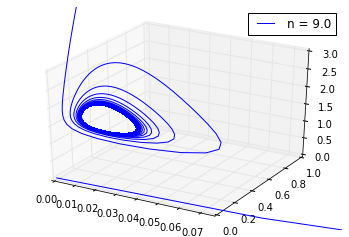

In [135]:
fig2=plt.figure();
ax4=fig2.add_subplot(1,1,1,projection='3d')

runs=[];
ns=np.arange(7.0,9.5,.5);
ns=[9.]
for n in ns:
    params=k1,KI,n,k2,k3,k4,k5,k6
    t_max=2000
    t_obs=np.linspace(0,t_max,t_max*10)
    s_obs=odeint(sdot,s0,t_obs,args=(params,))


    # trim transient behaviour
    t_trim=0
    obs_trim=int(t_trim*10) # because we used linspace with t_max*10 intervals
    t_obs=t_obs[obs_trim:]
    s_obs=s_obs[obs_trim:]

    runs+=[s_obs];
    xs=s_obs[:,0];
    ys=s_obs[:,1];
    zs=s_obs[:,2];

for n,s_obs in zip(ns,runs):
    xs=s_obs[:,0];
    ys=s_obs[:,1];
    zs=s_obs[:,2];
    ax4.plot(xs,ys,zs,label = 'n = '+str(n));
ax4.legend()
ax4.set_xlim(0,.075)
ax4.set_ylim(0,1.0)
ax4.set_zlim(0,3.0)

Q:\Ancond41.126\VFS\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


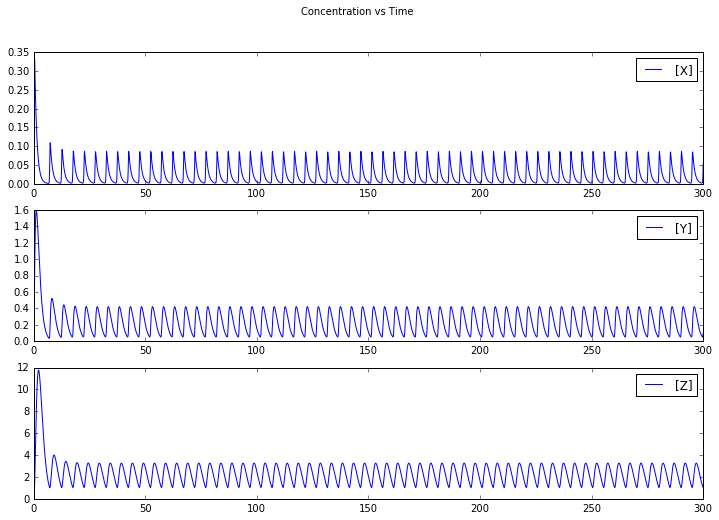

In [140]:
fig2=plt.figure();
ax4=fig2.add_subplot(1,1,1,projection='3d')

runs=[];
ns=np.arange(7.0,9.5,.5);
ns=[20.]
for n in ns:
    params=k1,KI,n,k2,k3,k4,k5,k6
    t_max=300
    t_obs=np.linspace(0,t_max,t_max*10)
    s_obs=odeint(sdot,s0,t_obs,args=(params,))


    # trim transient behaviour
    t_trim=0
    obs_trim=int(t_trim*10) # because we used linspace with t_max*10 intervals
    t_obs=t_obs[obs_trim:]
    s_obs=s_obs[obs_trim:]

    runs+=[s_obs];
    xs=s_obs[:,0];
    ys=s_obs[:,1];
    zs=s_obs[:,2];

for n,s_obs in zip(ns,runs):
    xs=s_obs[:,0];
    ys=s_obs[:,1];
    zs=s_obs[:,2];
    ax4.plot(xs,ys,zs,label = 'n = '+str(n));
ax4.legend()
ax4.set_xlim(0,.075)
ax4.set_ylim(0,1.0)
ax4.set_zlim(0,3.0)
## CREATE TIMESERIES PLOT
plt.close("all")
fig_timeseries = plt.figure(figsize=(12,8))
ax1=fig_timeseries.add_subplot(3,1,1)
ax2=fig_timeseries.add_subplot(3,1,2)
ax3=fig_timeseries.add_subplot(3,1,3)

fig_timeseries.suptitle('Concentration vs Time')
ax1.plot(t_obs, s_obs[:,0], '-',label='[X]')
ax2.plot(t_obs, s_obs[:,1], '-',label='[Y]')
ax3.plot(t_obs, s_obs[:,2], '-',label='[Z]')
ax1.legend()
ax2.legend()
ax3.legend()
fig_timeseries.show()


